Tecnica de ML no supervisada

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#librerias clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/CC_GENERAL.csv", sep=',')
df.sample(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6031,C16201,0.000000,0.000000,54.00,0.00,54.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,4000.0,0.000000,NaN,0.000000,12
521,C10545,4497.213951,1.000000,2001.19,210.43,1790.76,0.000000,1.000000,0.083333,1.000000,0.000000,0,30,4500.0,3058.768463,5067.863223,0.000000,12
2950,C13037,1530.883538,1.000000,964.67,964.67,0.00,0.000000,0.300000,0.300000,0.000000,0.000000,0,10,3000.0,288.366557,605.921914,0.000000,10
8151,C18371,7215.195760,1.000000,0.00,0.00,0.00,7275.716281,0.000000,0.000000,0.000000,0.166667,1,0,7500.0,809.179193,1639.238121,0.000000,6
7899,C18113,802.878440,1.000000,3228.26,2766.92,461.34,0.000000,1.000000,0.583333,1.000000,0.000000,0,61,3000.0,630.245499,291.309586,0.166667,12
5931,C16097,170.019011,0.500000,266.60,266.60,0.00,1199.729121,0.166667,0.166667,0.000000,0.166667,3,1,2500.0,293.055707,88.589314,0.000000,6
2406,C12479,397.003171,1.000000,3042.08,1419.07,1623.01,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,8500.0,2764.893686,246.737259,0.333333,12
4323,C14443,231.908240,0.818182,711.80,497.80,214.00,0.000000,0.666667,0.166667,0.416667,0.000000,0,10,8500.0,2007.282363,146.809491,0.111111,12
6215,C16388,629.744788,0.363636,354.50,354.50,0.00,3023.321998,0.083333,0.083333,0.000000,0.333333,21,3,5000.0,257.295601,418.943012,0.000000,12
3410,C13507,63.169044,1.000000,806.71,806.71,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,14,7500.0,705.485115,148.199188,0.181818,12


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.nunique()

,0
CUST_ID,8950
BALANCE,8871
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47
PURCHASES_INSTALLMENTS_FREQUENCY,47


In [160]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df==0].count()/ df.count() #cantidad de ceros por columna

,0
CUST_ID,0.000000
BALANCE,0.008939
BALANCE_FREQUENCY,0.008939
PURCHASES,0.228380
ONEOFF_PURCHASES,0.480670
INSTALLMENTS_PURCHASES,0.437542
CASH_ADVANCE,0.517095
PURCHASES_FREQUENCY,0.228268
ONEOFF_PURCHASES_FREQUENCY,0.480670
PURCHASES_INSTALLMENTS_FREQUENCY,0.437430


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [181]:
df2= df.copy()

In [182]:
df2['MINIMUM_PAYMENTS']=df2['MINIMUM_PAYMENTS'].fillna(df2['MINIMUM_PAYMENTS'].median()) #reemplaza valores nulos por la media
df2['CREDIT_LIMIT']=df2['CREDIT_LIMIT'].fillna(df2['CREDIT_LIMIT'].median())

In [184]:
print((df2['MINIMUM_PAYMENTS']<=0).sum()) #valores negativos o 0 que podrian afectar log
print((df2['CREDIT_LIMIT']<=0).sum())

0
0


In [189]:
df2['MINIMUM_PAYMENTS'].sample(10)

,MINIMUM_PAYMENTS
7999,1331.978248
8776,229.361230
2731,99.218174
4027,245.989844
7689,163.608183
5322,167.935540
8842,112.139670
6935,315.393952
7862,312.343947
3702,974.979137


In [190]:
df2.drop('CUST_ID', axis=1, inplace=True)

<Axes: >

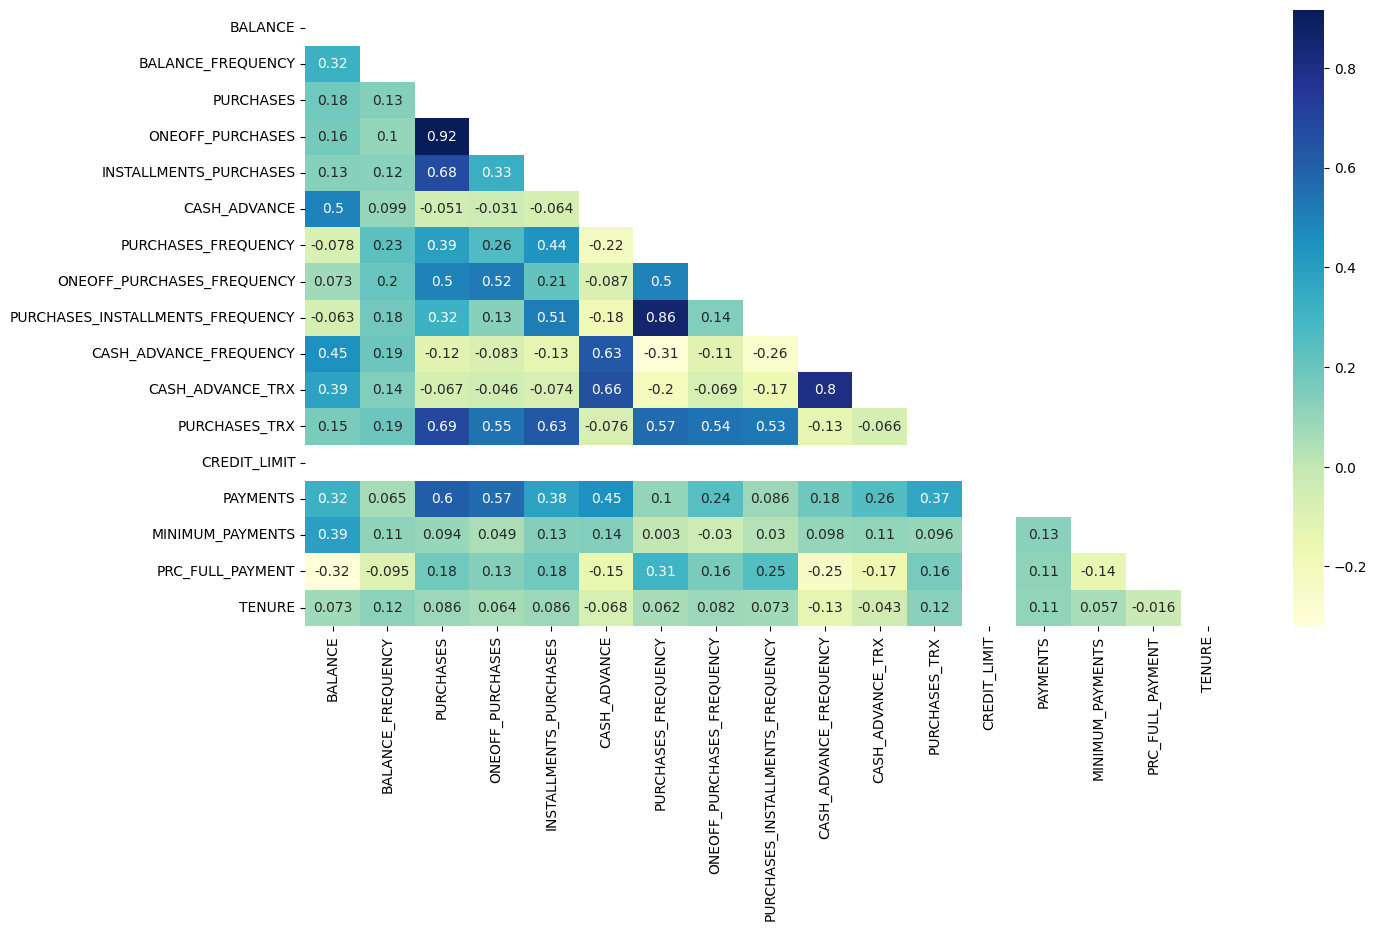

In [ ]:
corr_matrix=df2.corr()
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, mask=mask,  cmap='YlGnBu', annot=True)

In [191]:
df2.drop('PURCHASES', axis=1, inplace=True) #eliminacion de columnas con alta correlacion
df2.drop('PURCHASES_FREQUENCY', axis=1, inplace=True)
df2.sample(5)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5109,504.409631,1.0,199.00,139.90,0.000000,0.166667,0.166667,0.000000,0,5,2500.0,829.691401,190.314886,0.0,12
1515,4627.588589,1.0,1774.46,0.00,0.000000,0.583333,0.000000,0.000000,0,12,5200.0,864.174924,2154.424137,0.0,12
6945,799.255519,1.0,0.00,0.00,1494.880019,0.000000,0.000000,0.333333,8,0,1400.0,888.735185,262.491565,0.0,12
4170,826.018339,1.0,160.50,31.17,0.000000,0.250000,0.083333,0.000000,0,5,1200.0,443.248137,236.976635,0.0,12
2236,1475.871356,1.0,664.21,162.56,0.000000,1.000000,0.333333,0.000000,0,18,1500.0,1182.627097,1332.067827,0.0,12


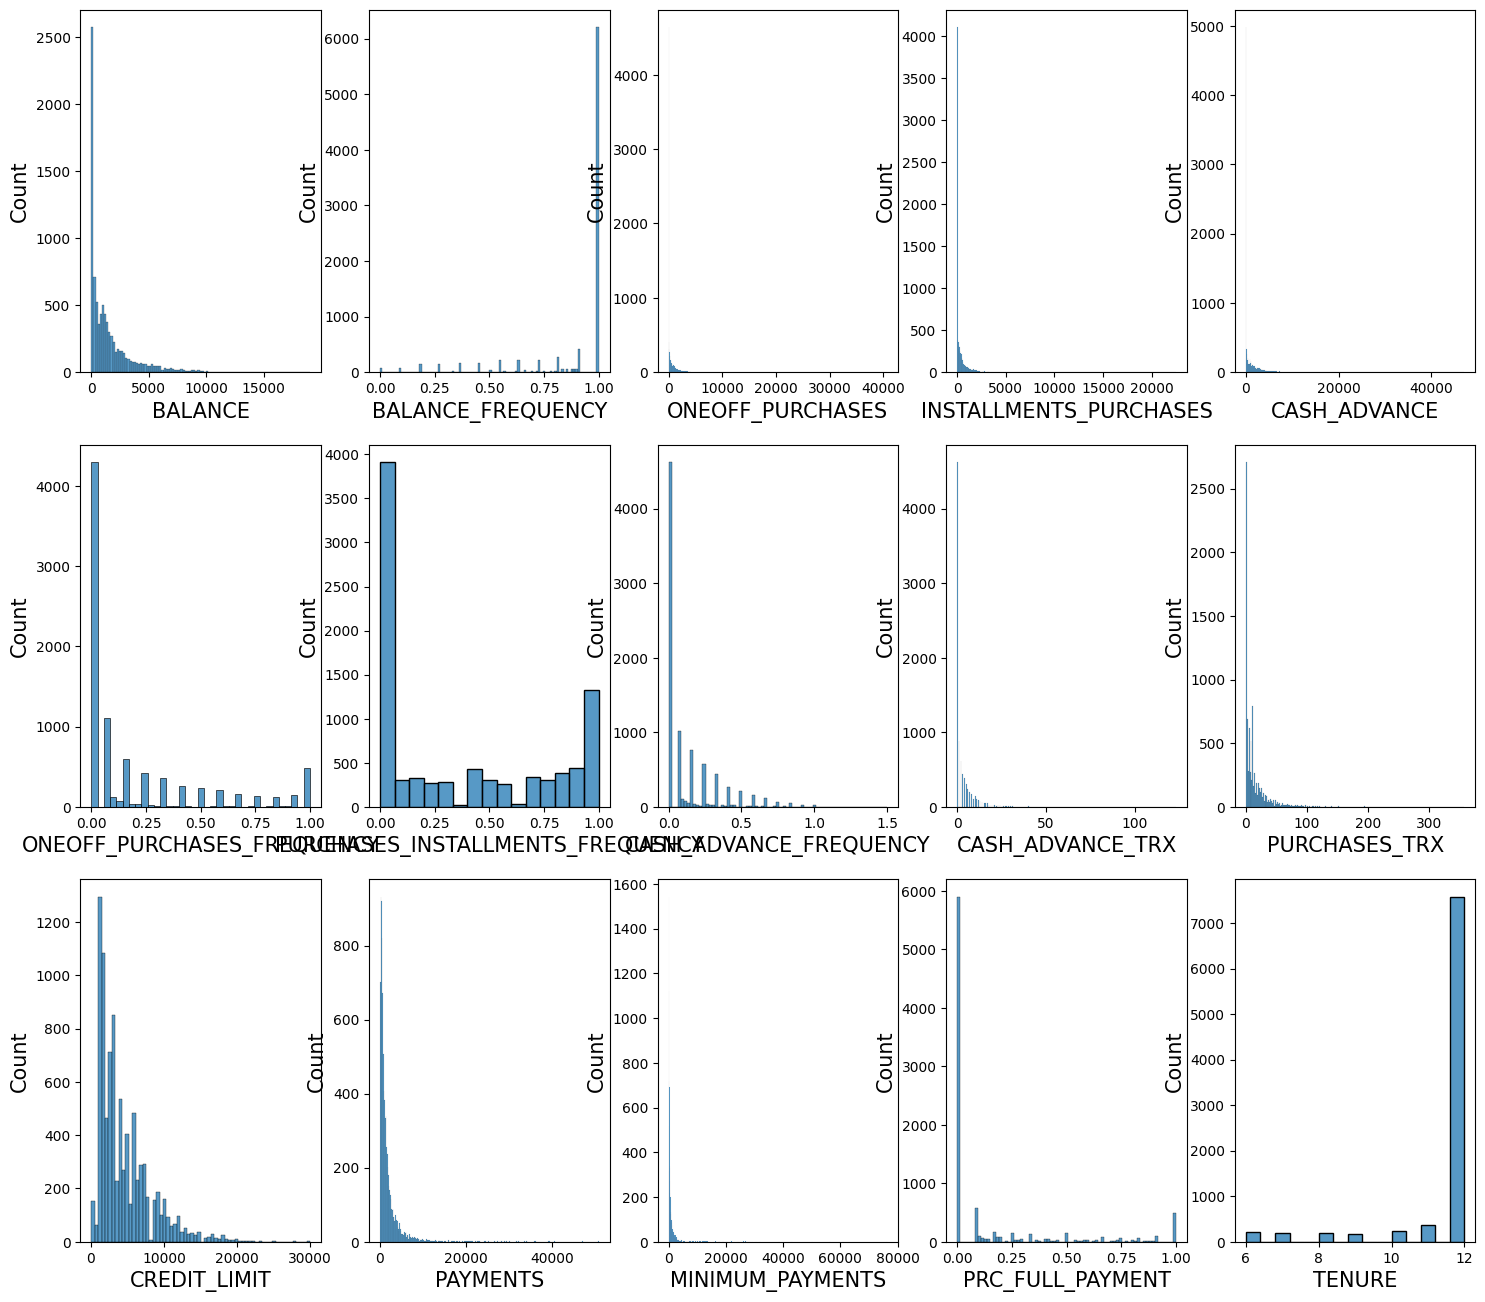

In [166]:
cols_num=df2.columns[[np.issubdtype(dt, np.number) for dt in df2.dtypes]]
fig, axes= plt.subplots(nrows=3, ncols=5, figsize=(18,16))
for i, column in enumerate(cols_num):
  sns.histplot(df2[column], ax=axes[i//5, i%5], kde=False)

[Text(0.5, 1.0, 'Boxplot de Outliers')]

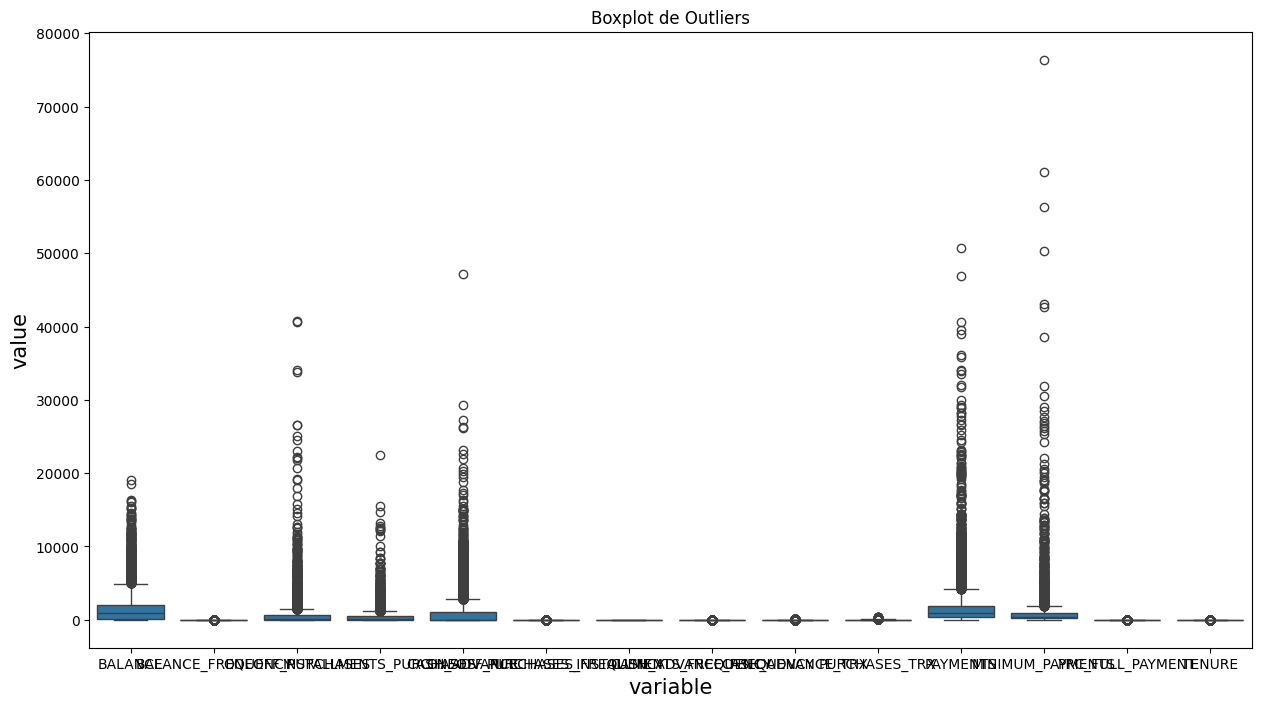

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='variable', y='value', data=pd.melt(df2[cols_num])).set(title='Boxplot de Outliers')

In [192]:
df2['BALANCE-log']=np.log(df2['BALANCE']+1) #se usa el +1 para evitar indeterminaciones de log(0) en valores cercanos al 0
df2['ONEOFF_PURCHASES-log']=np.log(df2['ONEOFF_PURCHASES']+1)
df2['INSTALLMENTS_PURCHASES-log']=np.log(df2['INSTALLMENTS_PURCHASES']+1)
df2['CASH_ADVANCE-log']=np.log(df2['CASH_ADVANCE']+1)
df2['CASH_ADVANCE_TRX-log']=np.log(df2['CASH_ADVANCE_TRX']+1)
df2['PURCHASES_TRX-log']=np.log(df2['PURCHASES_TRX']+1)
df2['CREDIT_LIMIT-log']=np.log(df2['CREDIT_LIMIT']+1)
df2['PAYMENTS-log']=np.log(df2['PAYMENTS']+1)
df2['MINIMUM_PAYMENTS-log']=np.log(df2['MINIMUM_PAYMENTS']+1)

In [193]:
df2.drop('BALANCE', axis=1, inplace=True)
df2.drop('ONEOFF_PURCHASES', axis=1, inplace=True)
df2.drop('INSTALLMENTS_PURCHASES', axis=1, inplace=True)
df2.drop('CASH_ADVANCE', axis=1, inplace=True)
df2.drop('CASH_ADVANCE_TRX', axis=1, inplace=True)
df2.drop('PURCHASES_TRX', axis=1, inplace=True)
df2.drop('CREDIT_LIMIT', axis=1, inplace=True)
df2.drop('PAYMENTS', axis=1, inplace=True)
df2.drop('MINIMUM_PAYMENTS', axis=1, inplace=True)

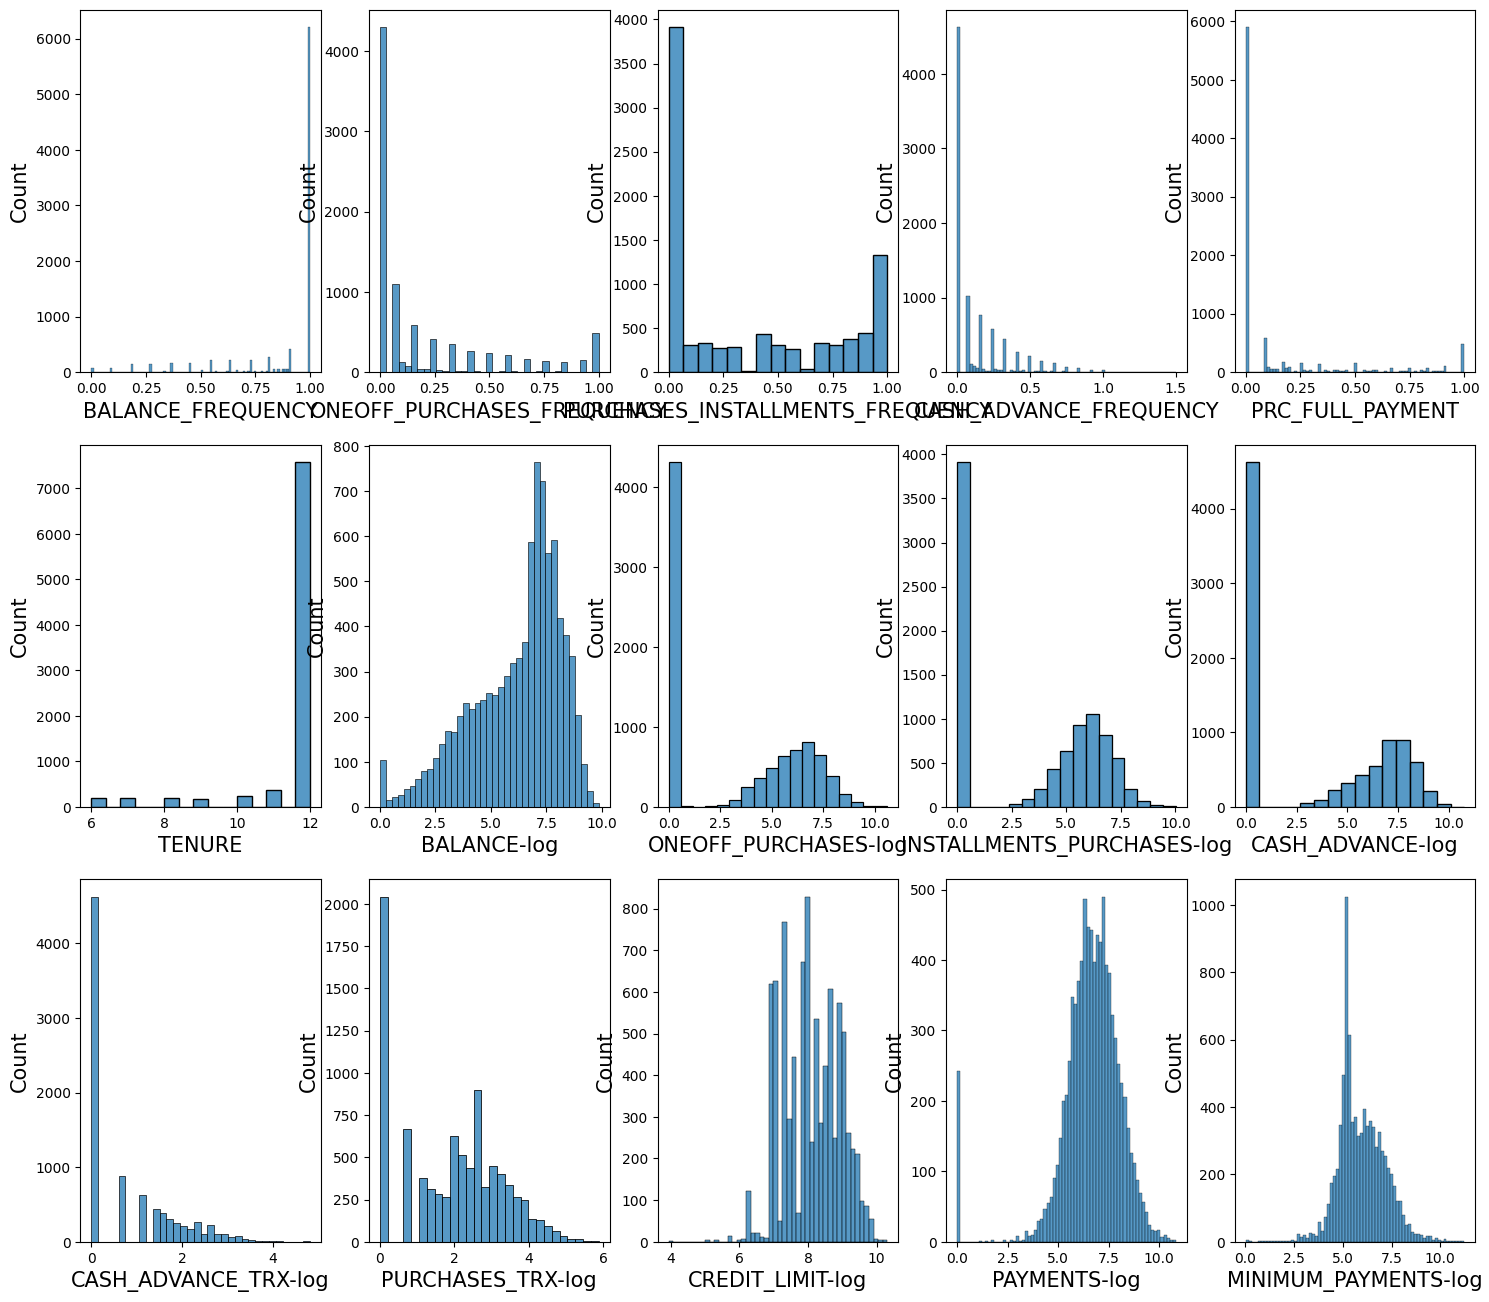

In [ ]:
cols_num=df2.columns[[np.issubdtype(dt, np.number) for dt in df2.dtypes]]
fig, axes= plt.subplots(nrows=3, ncols=5, figsize=(18,16))
for i, column in enumerate(cols_num):
  sns.histplot(df2[column], ax=axes[i//5, i%5], kde=False)

In [195]:
#Pair plot
from scipy.stats import pearsonr
def reg_coef(x,y, label=None, color=None, **kwargs):
  ax=plt.gca()
  r,p = pearsonr(x,y)
  ax.annotate('r={:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', fontsize=15)
  ax.set_axis_off()

Text(0.5, 0.98, 'Analisis de relacion')

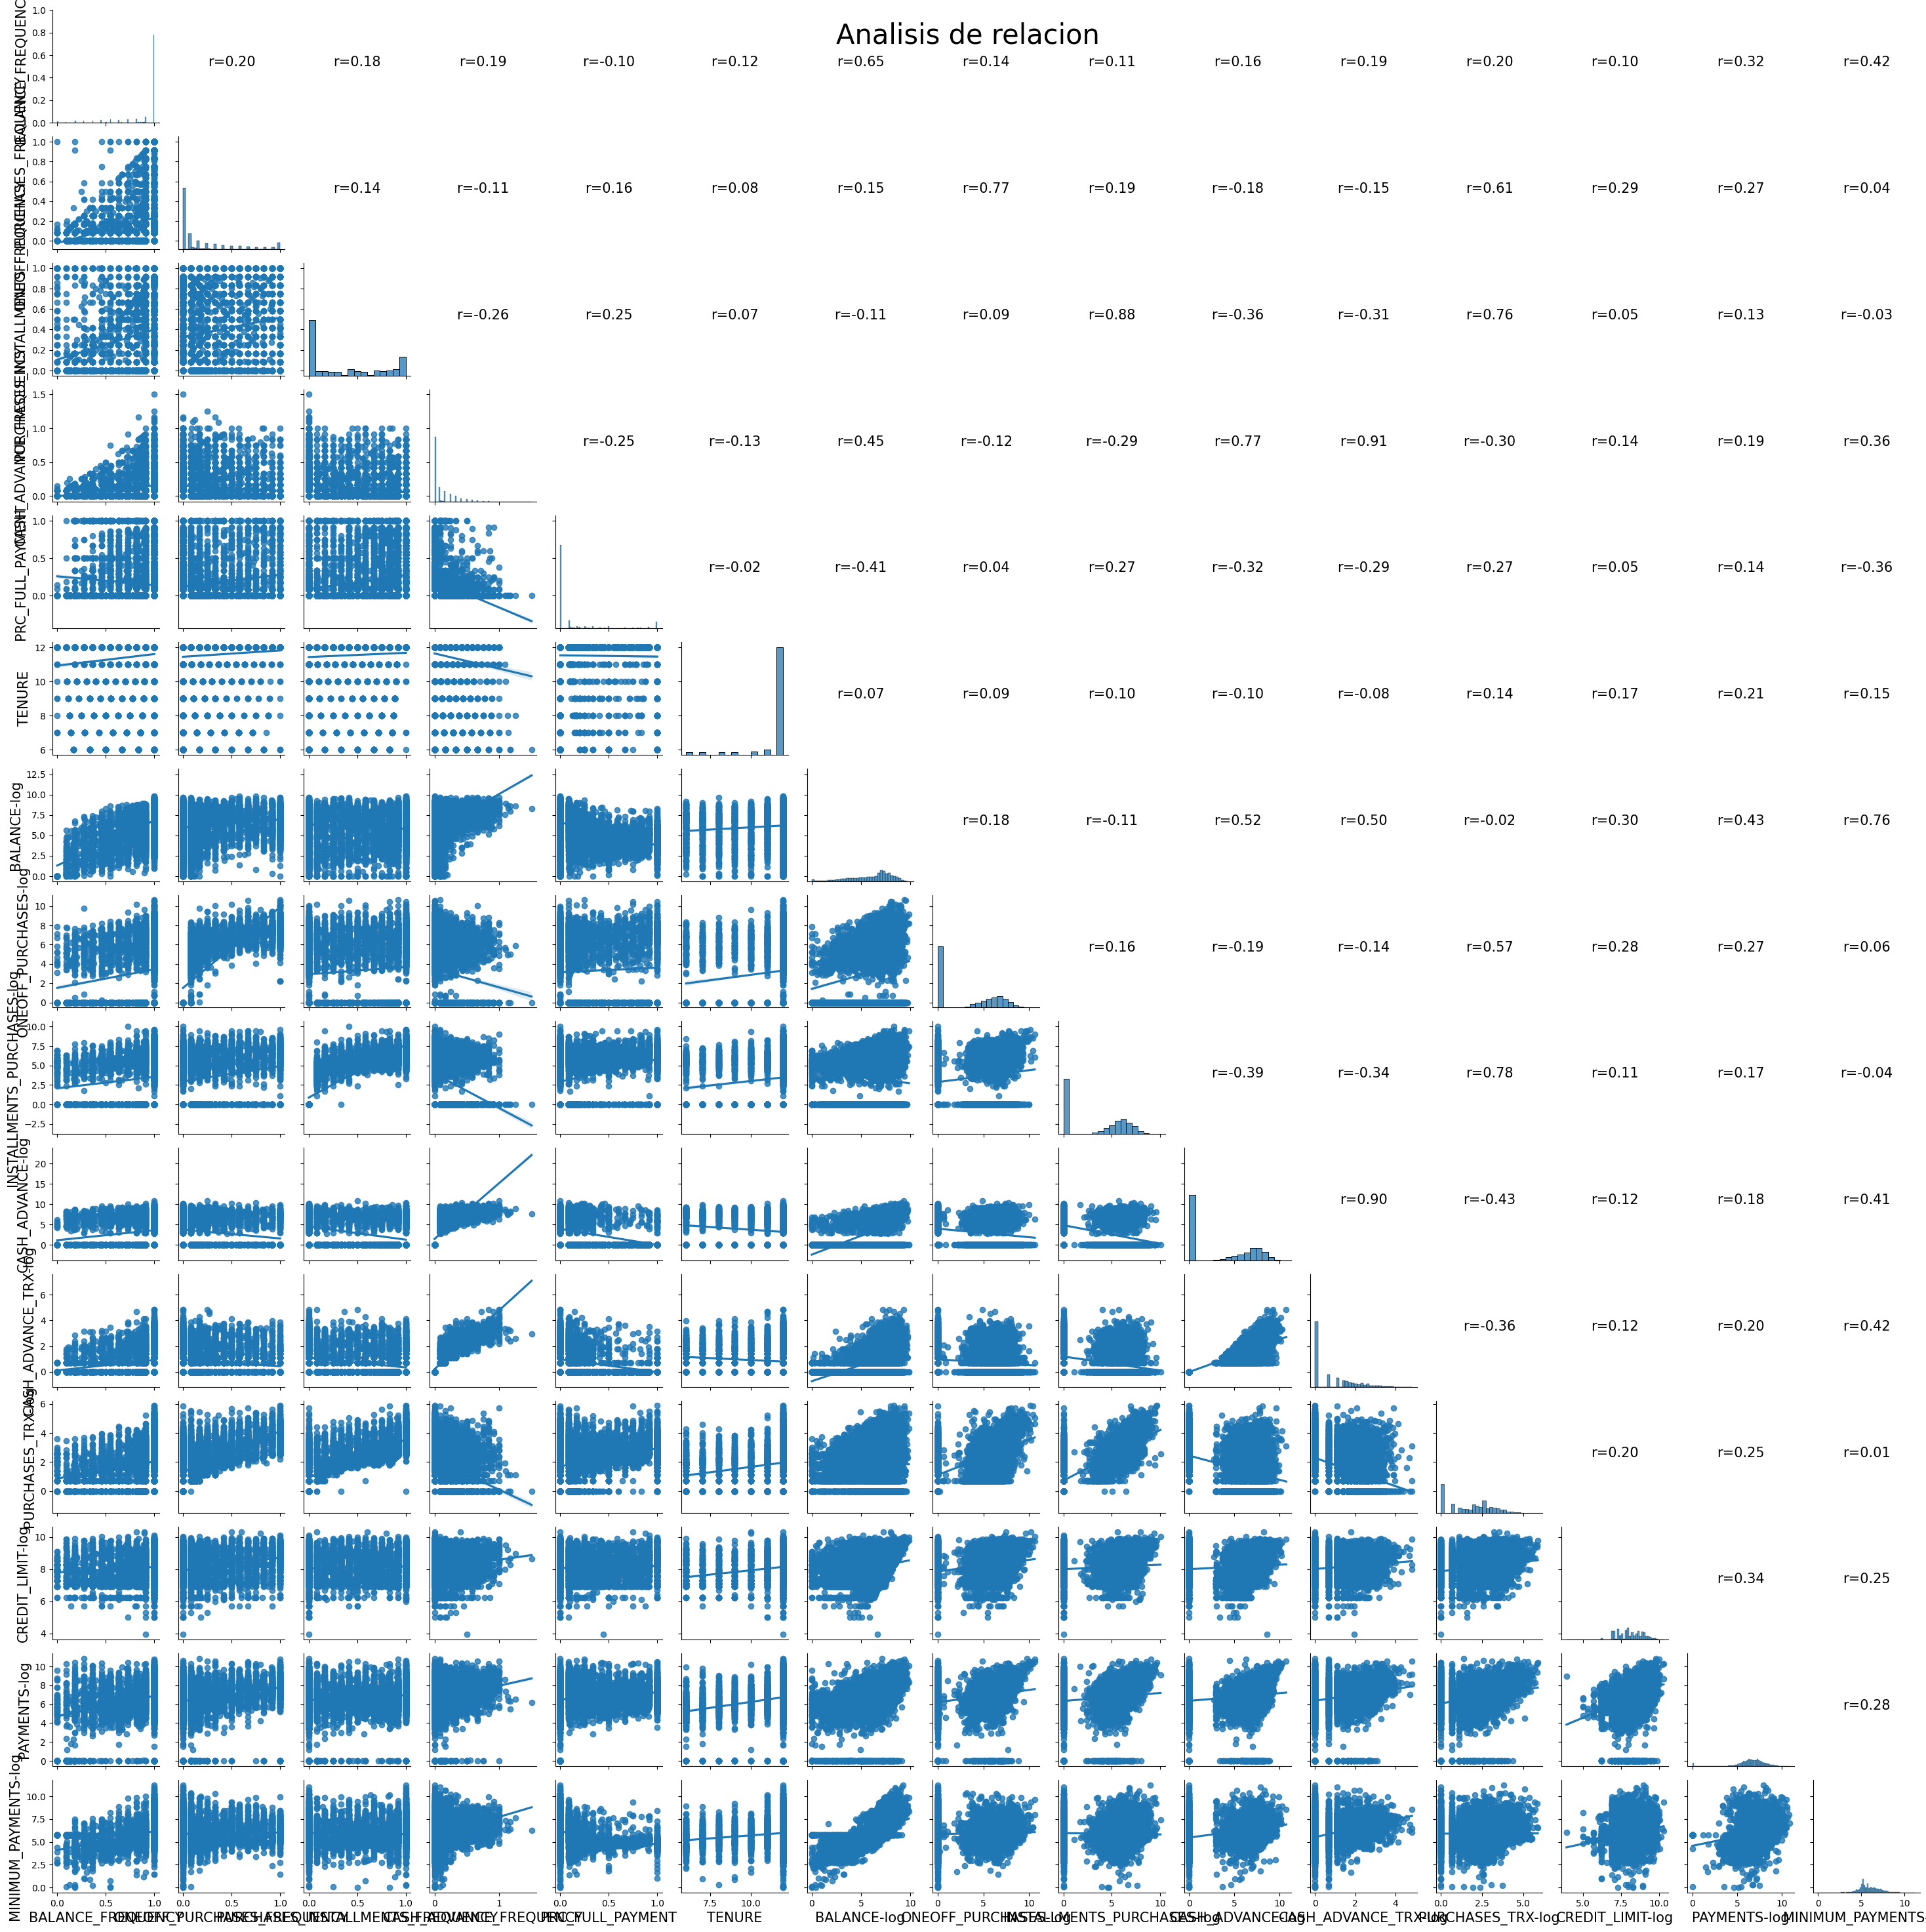

In [196]:
#matriz de coef de correlacion en la parte sup, graficas en la parte inf y graficas de pdf en la diagonal para entender la distribucion de la data
import matplotlib as mpl
mpl.rcParams['axes.labelsize']=15
g=sns.PairGrid(df2, height=2)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef, fontsize=20, cmap=plt.get_cmap('GnBu'))
g.fig.suptitle('Analisis de relacion', fontsize=30)

In [198]:
from scipy.stats import zscore
df2=df2.apply(zscore)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,0.518084,0.518084
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,0.326973,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,0.435149,6.820521
PRC_FULL_PAYMENT,8950.0,-9.526830e-18,1.000056,-0.525551,-0.525551,-0.525551,-0.037122,2.893453
TENURE,8950.0,2.921561e-16,1.000056,-4.122768,0.360680,0.360680,0.360680,0.360680
BALANCE-log,8950.0,0.000000e+00,1.000056,-3.060633,-0.645563,0.303937,0.728427,1.834341
ONEOFF_PURCHASES-log,8950.0,0.000000e+00,1.000056,-0.987090,-0.987090,0.141485,0.972218,2.283062
INSTALLMENTS_PURCHASES-log,8950.0,1.034058e-16,1.000056,-1.087454,-1.087454,0.372196,0.908121,2.163264
CASH_ADVANCE-log,8950.0,6.668781e-17,1.000056,-0.930733,-0.930733,-0.930733,1.036809,2.086805


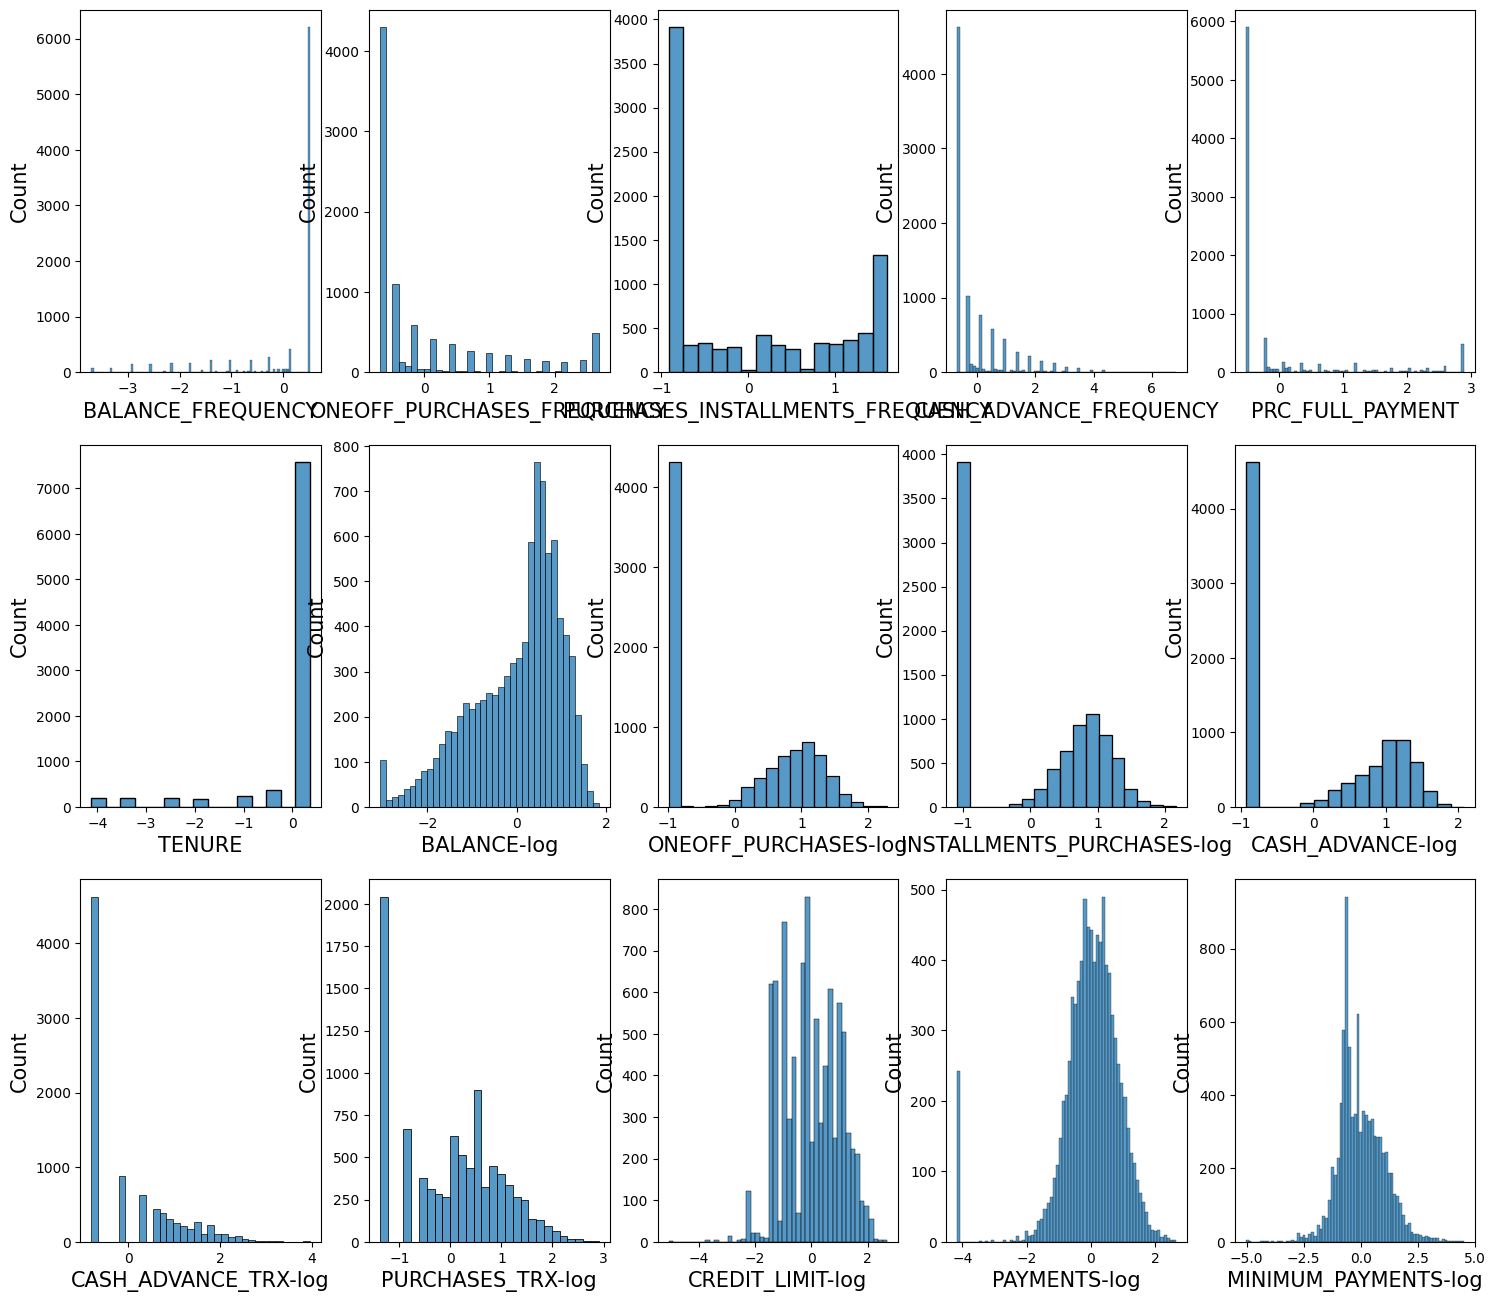

In [200]:
cols_num=df2.columns[[np.issubdtype(dt, np.number) for dt in df2.dtypes]]
fig, axes= plt.subplots(nrows=3, ncols=5, figsize=(18,16))
for i, column in enumerate(cols_num):
  sns.histplot(df2[column], ax=axes[i//5, i%5], kde=False)

Modelo Clustering K-Means

Text(0.5, 1.0, 'Resultados KMeans')

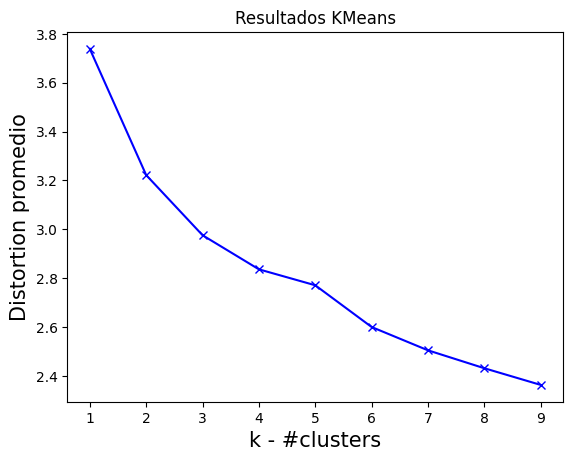

In [201]:
#Buscamos el numero optimo de clusters
from scipy.spatial.distance import cdist
clusters= range(1,10)
meanDistortions=[]
#grafico de codo de Elbow
for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(df2)
  prediction=model.predict(df2)
  meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1))/df2.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k - #clusters')
plt.ylabel('Distortion promedio')
plt.title('Resultados KMeans')


In [204]:
print(prediction)

[3 8 7 ... 0 5 7]


In [245]:
kmeans=KMeans(n_clusters=2, n_init=15, random_state=1)
kmeans.fit(df2)

KMeans(n_clusters=2, n_init=15, random_state=1)

In [246]:
centroids=kmeans.cluster_centers_
centroids

array([[ 0.20684233, -0.31957277, -0.53983897,  0.83564131, -0.40865542,
        -0.11547042,  0.58891817, -0.3322163 , -0.58666787,  1.03949477,
         0.96612906, -0.64975509,  0.03538254,  0.11665962,  0.47055522],
       [-0.14964503,  0.23120256,  0.39055941, -0.60456468,  0.29565154,
         0.08353983, -0.42606693,  0.24034983,  0.4244389 , -0.75204734,
        -0.69896916,  0.47008085, -0.02559835, -0.08440019, -0.34043443]])

In [247]:
centroid_df= pd.DataFrame(centroids, columns=df2.columns) #se mapea los centroides con la lista de elementos
centroid_df


,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,BALANCE-log,ONEOFF_PURCHASES-log,INSTALLMENTS_PURCHASES-log,CASH_ADVANCE-log,CASH_ADVANCE_TRX-log,PURCHASES_TRX-log,CREDIT_LIMIT-log,PAYMENTS-log,MINIMUM_PAYMENTS-log
0,0.206842,-0.319573,-0.539839,0.835641,-0.408655,-0.11547,0.588918,-0.332216,-0.586668,1.039495,0.966129,-0.649755,0.035383,0.11666,0.470555
1,-0.149645,0.231203,0.390559,-0.604565,0.295652,0.08354,-0.426067,0.240350,0.424439,-0.752047,-0.698969,0.470081,-0.025598,-0.08440,-0.340434


In [248]:
df_labels=pd.DataFrame(kmeans.labels_, columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')
df_labeled=df2.join(df_labels)
df_labeled.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'PRC_FULL_PAYMENT', 'TENURE', 'BALANCE-log', 'ONEOFF_PURCHASES-log',
       'INSTALLMENTS_PURCHASES-log', 'CASH_ADVANCE-log',
       'CASH_ADVANCE_TRX-log', 'PURCHASES_TRX-log', 'CREDIT_LIMIT-log',
       'PAYMENTS-log', 'MINIMUM_PAYMENTS-log', 'labels'],
      dtype='object')

In [249]:
df_labeled.sample(10)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,BALANCE-log,ONEOFF_PURCHASES-log,INSTALLMENTS_PURCHASES-log,CASH_ADVANCE-log,CASH_ADVANCE_TRX-log,PURCHASES_TRX-log,CREDIT_LIMIT-log,PAYMENTS-log,MINIMUM_PAYMENTS-log,labels
886,0.518084,1.276737,1.599199,-0.675349,-0.525551,0.360680,1.475968,1.513599,1.344313,-0.930733,-0.810069,2.015395,1.531711,1.173037,2.784906,1
5333,0.518084,-0.399319,-0.916995,-0.258913,-0.525551,0.360680,0.347198,0.153719,-1.087454,0.891530,0.563506,-0.874655,-0.730527,0.498793,-0.506012,0
5274,0.518084,-0.678661,-0.916995,1.406839,-0.525551,0.360680,0.982415,-0.987090,-1.087454,1.274502,1.250294,-1.379210,0.243386,0.246709,0.583323,0
6607,0.518084,-0.399319,-0.497629,-0.675349,-0.525551,0.360680,0.322003,0.126515,0.338019,-0.930733,-0.810069,-0.370100,-1.447163,-0.647802,-0.527254,1
566,0.134325,1.556082,-0.916995,-0.675349,2.893453,0.360680,-1.372268,0.725593,-1.087454,-0.930733,-0.810069,0.683139,1.583635,-0.253182,-1.070479,1
3442,0.518084,2.394110,-0.916995,-0.675349,-0.240635,0.360680,0.483345,1.016573,-1.087454,-0.930733,-0.810069,0.487865,-0.379686,0.876361,1.057180,1
8695,0.518084,-0.678661,1.239743,-0.675349,0.158250,-3.375526,-1.159892,-0.987090,0.575373,-0.930733,-0.810069,0.134455,-1.447163,-1.599557,-1.087977,1
262,0.518084,2.114765,0.970151,-0.258913,-0.240635,0.360680,0.725358,1.633314,1.434488,0.544050,-0.123281,1.828524,-0.107523,1.015533,1.320603,1
3612,0.518084,-0.119974,0.131420,-0.675349,-0.525551,0.360680,0.421517,0.757205,0.676792,-0.930733,-0.810069,0.134455,1.583635,0.570754,-0.227299,1
8692,0.049045,-0.678661,-0.916995,-0.120100,-0.525551,-1.881044,0.366586,-0.987090,-1.087454,1.041904,-0.123281,-1.379210,-1.224909,-1.036643,-0.271816,0


In [250]:
df_labeled['labels'].value_counts()

,count
labels,
1,5196
0,3754


Text(0.5, 1.0, 'KMeans')

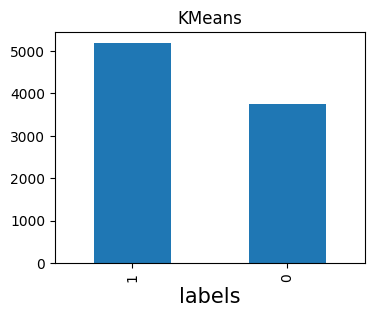

In [251]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
pd.value_counts(df_labeled['labels']).plot(kind='bar', ax=ax).set_title('KMeans')

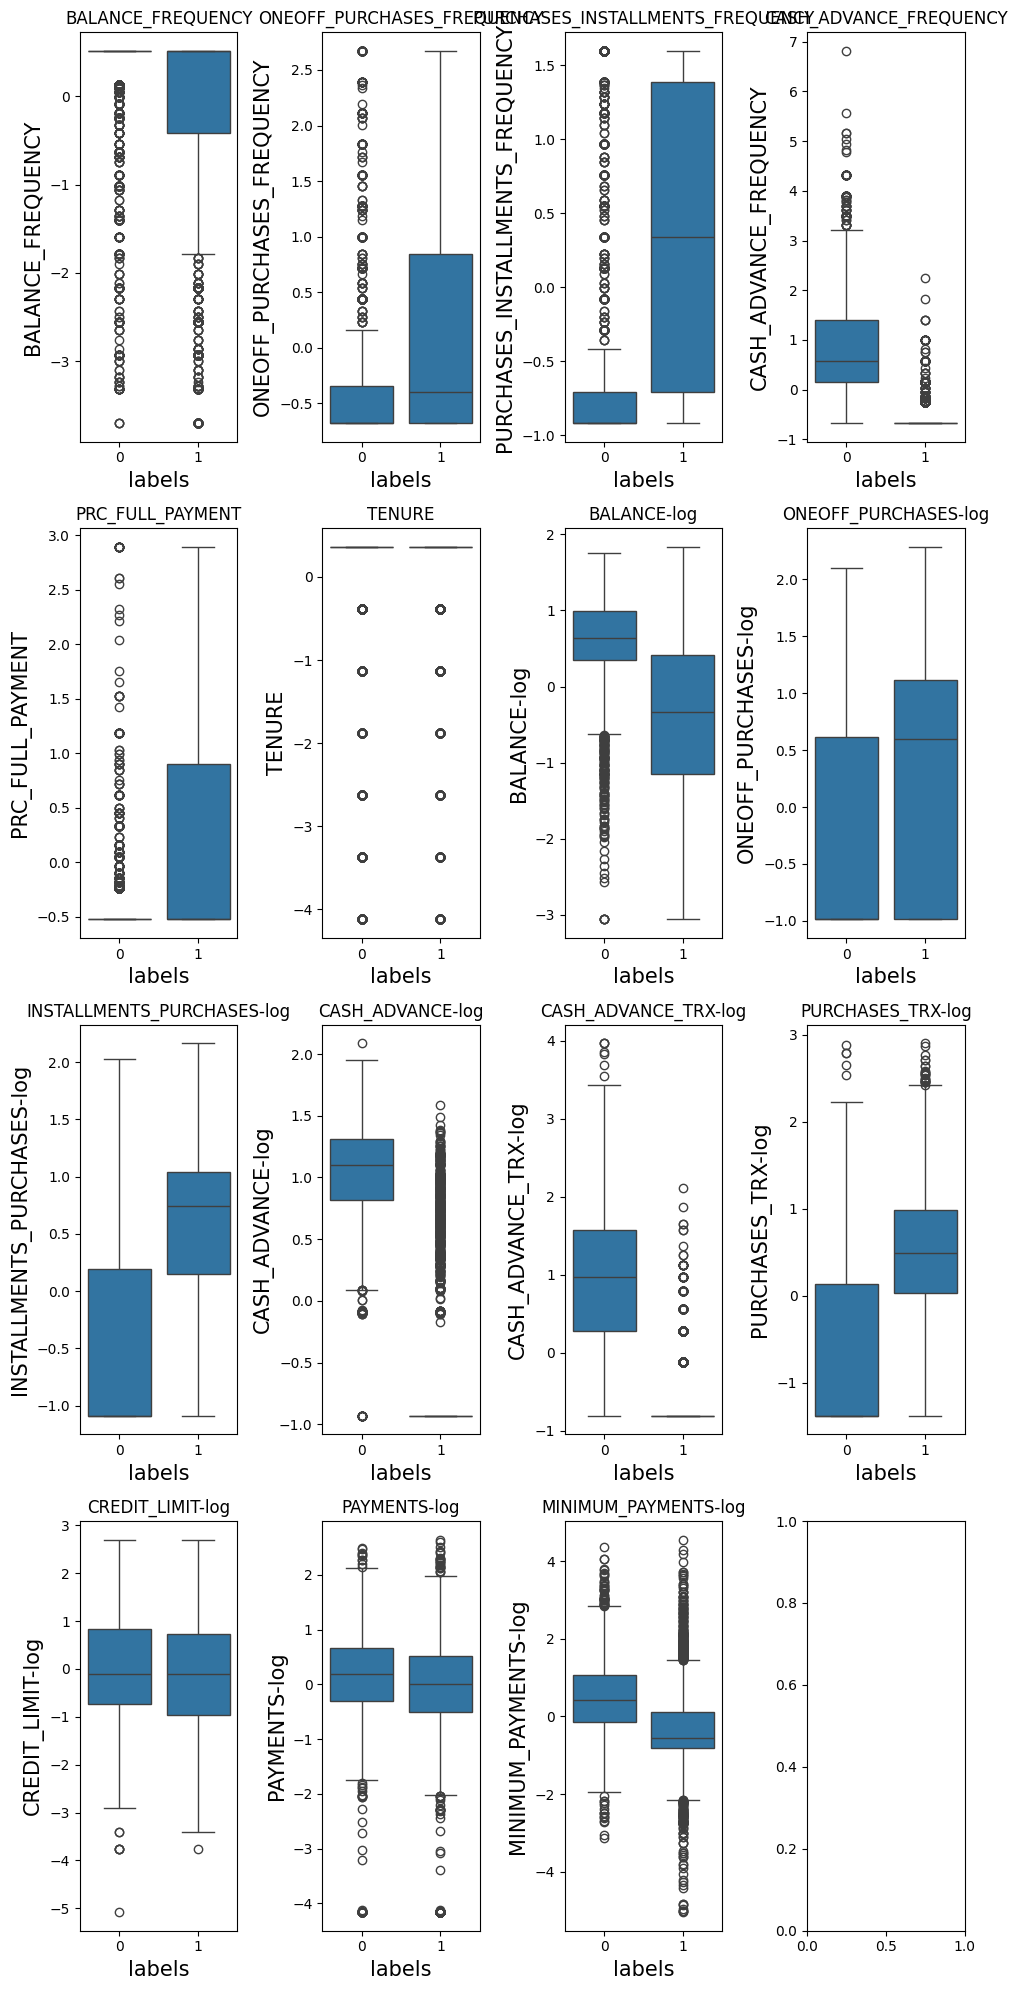

In [252]:
cols_num=df2.columns[[np.issubdtype(dt, np.number) for dt in df2.dtypes]]
n_cols=len(cols_num)
rows=(n_cols+1)//4
fig, ax= plt.subplots(rows, 4,figsize=(10,5*rows))
for i, var in enumerate(cols_num, 0):
  sns.boxplot(x='labels', y=var, data=df_labeled, ax=ax.flatten()[i])
  ax.flatten()[i].set_title(var)

plt.tight_layout()
plt.show()

In [253]:
df2.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'PRC_FULL_PAYMENT', 'TENURE', 'BALANCE-log', 'ONEOFF_PURCHASES-log',
       'INSTALLMENTS_PURCHASES-log', 'CASH_ADVANCE-log',
       'CASH_ADVANCE_TRX-log', 'PURCHASES_TRX-log', 'CREDIT_LIMIT-log',
       'PAYMENTS-log', 'MINIMUM_PAYMENTS-log'],
      dtype='object')

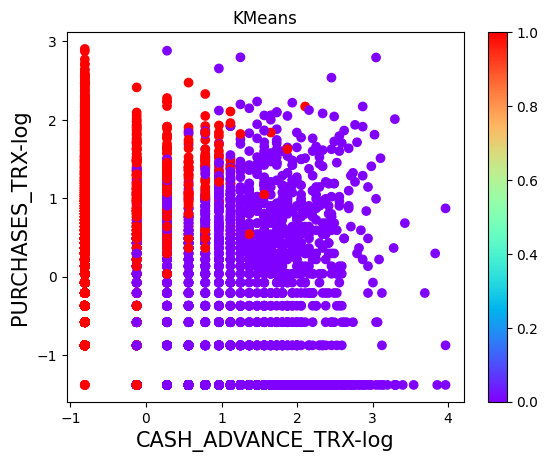

In [254]:
#grafico de clusters
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df2['CASH_ADVANCE_TRX-log'], df2['PURCHASES_TRX-log'], c=kmeans.labels_, cmap='rainbow')
ax.set_title('KMeans')
ax.set_xlabel('CASH_ADVANCE_TRX-log')
ax.set_ylabel('PURCHASES_TRX-log')
plt.colorbar(scatter)

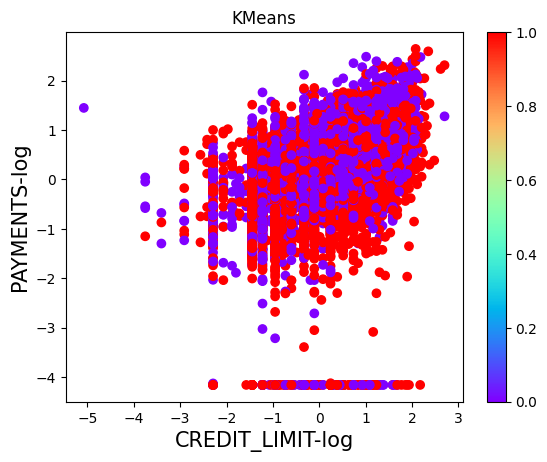

In [255]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df2['CREDIT_LIMIT-log'], df2['PAYMENTS-log'], c=kmeans.labels_, cmap='rainbow')
ax.set_title('KMeans')
ax.set_xlabel('CREDIT_LIMIT-log')
ax.set_ylabel('PAYMENTS-log')
plt.colorbar(scatter)

##Hierarchial Clustering
clustering jerarquico (dendograma)

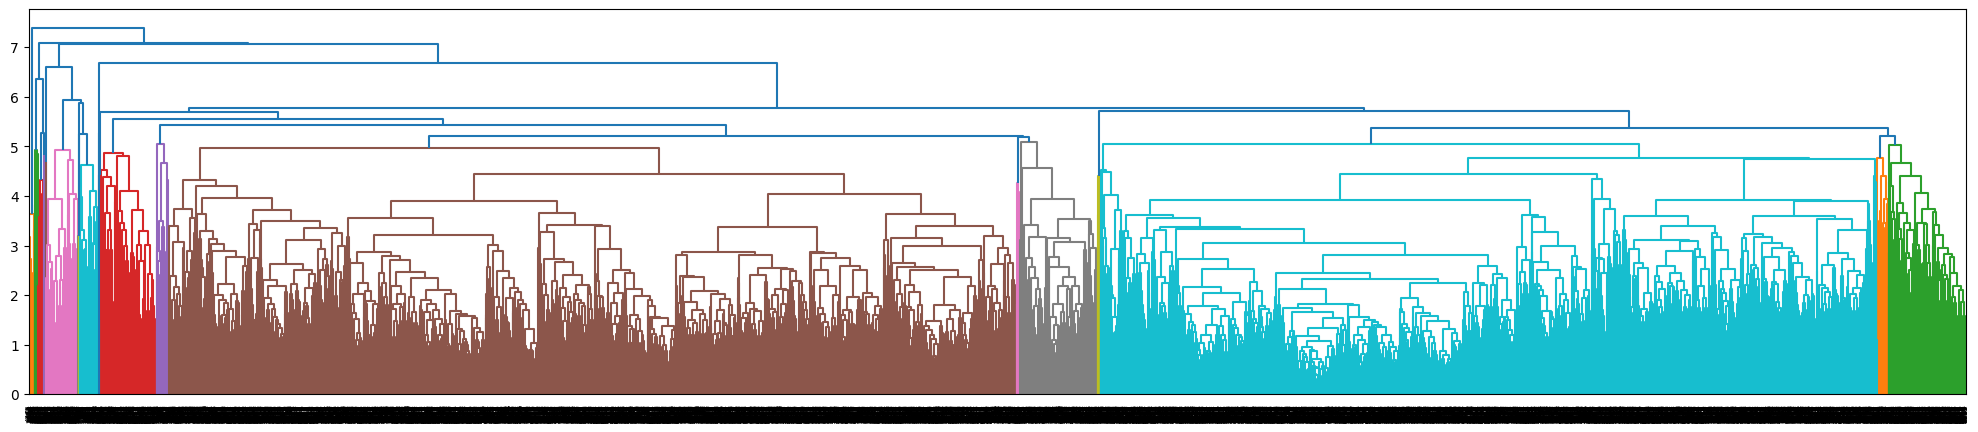

In [256]:
#con distancia euclididana
from scipy.cluster.hierarchy import linkage
Z=linkage(df2, 'average', metric='euclidean')
Z.shape
#dendograma
plt.figure(figsize=(25,5))
dendrogram(Z)
plt.show()


In [257]:
#calculamos el coeficiente cofenetico para validar la calidad del fit del dendograma (el coef max es 1)
c, coph_dists=cophenet(Z, pdist(df2))
c

np.float64(0.6436796692644402)

##Silhouette score
grafico para saber cual seria el mejor numero de clusters

In [240]:
sil_df= pd.DataFrame({}, columns=['Model', 'n_clusters', 'score'], index=None) #df del resultado

Text(0.5, 1.0, 'Silhouette Score')

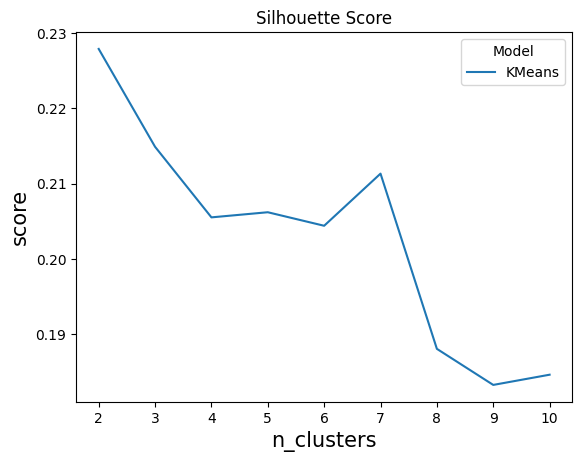

In [258]:
from sklearn.metrics import silhouette_score
#resultado de kmeans de 2 a 10 clusters
clusters=range(2,11)
sil_results = []

for n_clusters in clusters:
  clusterer=KMeans(n_clusters=n_clusters, random_state=1, n_init=10)
  preds=clusterer.fit_predict(df2)
  centers=clusterer.cluster_centers_
  score=silhouette_score(df2, clusterer.labels_, metric='euclidean')
  sil_results.append({'Model':'KMeans', 'n_clusters':n_clusters, 'score':score})

sil_df = pd.DataFrame(sil_results)

sns.lineplot(data=sil_df, x='n_clusters', y='score', hue='Model', style='Model', ci=None).set_title('Silhouette Score')

Vemos que el mejor cluster era k=2